# Engineering Placement Prediction

#### Import Relevant Libraries

In [70]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import autoreload
import missingno as msno
import csv
import os
import sys

from collections import defaultdict, Counter
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

sb.set_style("darkgrid")
sb.set()

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 55)

%matplotlib inline
%reload_ext autoreload
%autoreload 2

#### Load and Manipulate Data

In [50]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\Engineering Placements Prediction\collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


#### Statistical Analysis 

In [51]:
df.shape

(2966, 8)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [53]:
df.describe().round()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.0,2966.0,2966.0,2966.0,2966.0,2966.0
mean,21.0,1.0,7.0,0.0,0.0,1.0
std,1.0,1.0,1.0,0.0,0.0,0.0
min,19.0,0.0,5.0,0.0,0.0,0.0
25%,21.0,0.0,6.0,0.0,0.0,0.0
50%,21.0,1.0,7.0,0.0,0.0,1.0
75%,22.0,1.0,8.0,1.0,0.0,1.0
max,30.0,3.0,9.0,1.0,1.0,1.0


In [54]:
df["Age"].unique()

array([22, 21, 23, 24, 28, 30, 25, 26, 20, 19, 29], dtype=int64)

In [55]:
df.Internships.unique()

array([1, 0, 2, 3], dtype=int64)

In [56]:
df.CGPA.unique()

array([8, 7, 6, 9, 5], dtype=int64)

In [57]:
df.Hostel.unique()

array([1, 0], dtype=int64)

In [58]:
df.HistoryOfBacklogs.unique()

array([1, 0], dtype=int64)

In [59]:
df.PlacedOrNot.unique()

array([1, 0], dtype=int64)

In [60]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [61]:
df.Stream.unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [62]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

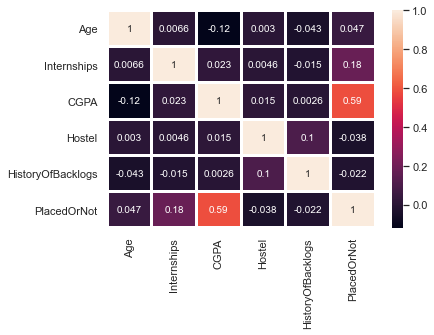

In [63]:
sb.heatmap(df.corr(), annot = True, linewidths = 2)

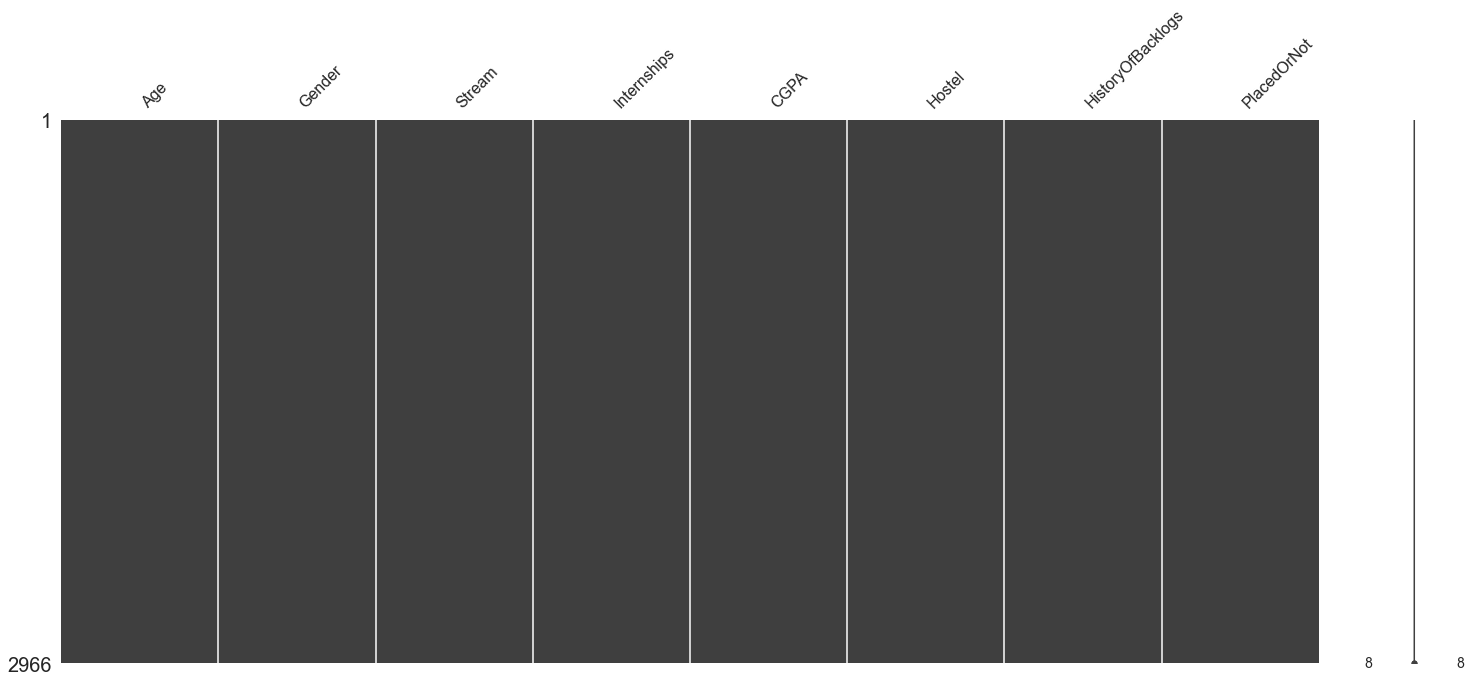

In [64]:
msno.matrix(df)

#### Feature Engineering 

In [65]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


#### Perform One-Hot Encoding

In [66]:
le = LabelEncoder()


In [67]:
x = df.drop(columns = ["PlacedOrNot"])
y = df["PlacedOrNot"]

x = x.apply(le.fit_transform)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2372, 7)
(594, 7)
(2372,)
(594,)


#### Build a Model to Algorithmic Predict Placement

In [76]:
dtc = DecisionTreeRegressor()

dtc.fit(x_train, y_train)

pred = dtc.predict(x_train)
print(pred)


[0.     1.     1.     ... 0.     0.     0.0625]
